In [50]:
# Importing the Keras libraries and packages
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from numpy.random import seed
import os
import random
from keras.optimizers import Adam

In [2]:
# seed = 2
# def reset_random_seeds():
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     tensorflow.random.set_seed(seed)
#     np.random.seed(seed)
#     random.seed(seed)

In [7]:
# Part 1 - Develop a Baseline CNN Model

# A baseline model will show us a minimal model performance 
# to which other models will be compared


img_rows = 128
img_cols = 128
epochs = 35
batch_size = 64
num_of_train_samples = 3360
num_of_test_samples = 1440

In [10]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    pyplot.figure(figsize=(10,5))
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='blue', label='test')
    pyplot.legend()
    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('\nClassification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='blue', label='test')
    pyplot.legend()
    # save plot to file
#     filename = sys.argv[0].split('/')[-1]
#     pyplot.savefig(filename + '_plot.png')
#     pyplot.close()
    pyplot.show()

In [11]:
# Function that calculates Confusion Matrix and shows Classification Report
def class_report(test_set, model):
    Y_pred = model.predict(test_set, num_of_test_samples // batch_size + 1)
    y_pred = np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(test_set.classes, y_pred))
    print('Classification Report')
    target_names = list(training_set.class_indices.keys())
    print(classification_report(test_set.classes, y_pred, target_names=target_names))

In [13]:
import splitfolders #link - https://pypi.org/project/split-folders/

# Divide all artists folders to train and val folders
splitfolders.ratio("./artists", output="./", seed=42 , ratio=(.7, .3))

Copying files: 4800 files [00:04, 1141.62 files/s]


In [14]:
# Prepare the data. Instanciate ImageDataGenerator that scalse the pixel values to the range of 0-1
# We don't use data augmentation, dropout etc for the Baseline models to check a minimal model performance 
datagen = ImageDataGenerator(rescale=1. / 255)

training_set = datagen.flow_from_directory('train', 
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.


In [15]:
print(test_set.class_indices)

{'Matisse': 0, 'Monet': 1, 'Pissaro': 2, 'Renoir': 3, 'Sargent': 4, 'VanGogh': 5}


In [16]:
# VGG Blocks
# The basic building block of classic CNNs is a sequence of the following: 
#     (i) a convolutional layer with padding to maintain the resolution, 
#     (ii) a nonlinearity such as a ReLU, 
#     (iii) a pooling layer such as a max pooling layer. 
# One VGG block consists of a sequence of convolutional layers, 
# followed by a max pooling layer for spatial downsampling. 
# In the original VGG paper [Simonyan & Zisserman, 2014], the authors employed convolutions with  3×3  kernels 
# with padding of 1 (keeping height and width) 
# and  2×2  max pooling with stride of 2 (halving the resolution after each block). 

In [18]:
# Define CNN model with one VGG-style block
# The 1-block VGG model has a single convolutional layer with 32 filters 
# followed by a max pooling layer
def baseline_model_1():
    #reset_random_seeds()
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

<h3>Baseline model with 1 VGG block without dropout</h3>


In [29]:
# The model will be fit for 35 epochs - to check if the model can learn the problem.
# Define model
model = baseline_model_1()
# Fit model
history = model.fit_generator(training_set, 
                              steps_per_epoch=len(training_set), # = num_of_train_samples // batch_size +1
                              validation_data=test_set, 
                              validation_steps=len(test_set), # = num_of_test_samples // batch_size +1
                              epochs= epochs)

Epoch 1/35
53/53 [==============================] - 19s 345ms/step - loss: 2.1140 - accuracy: 0.1857 - val_loss: 1.7105 - val_accuracy: 0.2715
Epoch 2/35
53/53 [==============================] - 18s 341ms/step - loss: 1.6784 - accuracy: 0.2689 - val_loss: 1.6346 - val_accuracy: 0.3049
Epoch 3/35
53/53 [==============================] - 18s 339ms/step - loss: 1.5612 - accuracy: 0.3433 - val_loss: 1.5695 - val_accuracy: 0.3653
Epoch 4/35
53/53 [==============================] - 18s 338ms/step - loss: 1.5107 - accuracy: 0.4050 - val_loss: 1.5351 - val_accuracy: 0.3736
Epoch 5/35
53/53 [==============================] - 19s 367ms/step - loss: 1.4499 - accuracy: 0.4192 - val_loss: 1.5140 - val_accuracy: 0.3903
Epoch 6/35
53/53 [==============================] - 18s 334ms/step - loss: 1.4196 - accuracy: 0.4304 - val_loss: 1.6536 - val_accuracy: 0.3313
Epoch 7/35
53/53 [==============================] - 18s 336ms/step - loss: 1.4441 - accuracy: 0.4257 - val_loss: 1.4878 - val_accuracy: 0.4028

In [30]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 54.3750


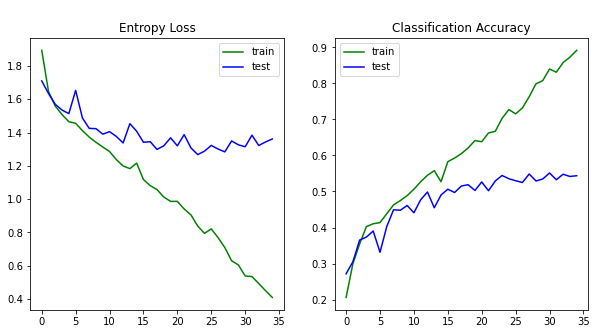

In [31]:
# Build graphs
summarize_diagnostics(history)

In [32]:
class_report(test_set, model)

Confusion Matrix
[[130  51  10  15  22  12]
 [  8 160  26   9  11  26]
 [  7  60 136  15   5  17]
 [ 16  22  21 123  35  23]
 [ 23  47  11  20 125  14]
 [ 12  46  26  21  26 109]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.66      0.54      0.60       240
       Monet       0.41      0.67      0.51       240
     Pissaro       0.59      0.57      0.58       240
      Renoir       0.61      0.51      0.56       240
     Sargent       0.56      0.52      0.54       240
     VanGogh       0.54      0.45      0.49       240

    accuracy                           0.54      1440
   macro avg       0.56      0.54      0.55      1440
weighted avg       0.56      0.54      0.55      1440



<h3>Baseline model with 2 VGG blocks without dropout</h3>


In [19]:
# Define CNN model with two VGG-style blocks
def baseline_model_2():
   # reset_random_seeds()
    model = Sequential()
# 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
# 2d block    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
# The model will be fit for 20 epochs - to check if the model can learn the problem.
# define model
model = baseline_model_2()
# fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 30, 
                              verbose = 0)

In [21]:
# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 56.7361


In [22]:
class_report(test_set, model)

Confusion Matrix
[[137  22  10  35  14  22]
 [  8 152  31   9   8  32]
 [ 13  38 123  26   6  34]
 [ 23  12  15 158  15  17]
 [ 39  19  17  39 110  16]
 [ 14  17  34  24  14 137]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.59      0.57      0.58       240
       Monet       0.58      0.63      0.61       240
     Pissaro       0.53      0.51      0.52       240
      Renoir       0.54      0.66      0.60       240
     Sargent       0.66      0.46      0.54       240
     VanGogh       0.53      0.57      0.55       240

    accuracy                           0.57      1440
   macro avg       0.57      0.57      0.57      1440
weighted avg       0.57      0.57      0.57      1440



In [ ]:
# Build graphs
summarize_diagnostics(history)

<h3>Baseline model with 3 VGG blocks without dropout</h3>


In [38]:
# Define CNN model with three VGG-style blocks
def baseline_model_3():
    #reset_random_seeds()
    model = Sequential()
# 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
# 2d block    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
# 3d block
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [39]:
# The model will be fit for 20 epochs - to check if the model can learn the problem.
# Define model
model = baseline_model_3()
# Fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 30)

Epoch 1/30
53/53 [==============================] - 39s 729ms/step - loss: 1.9867 - accuracy: 0.2299 - val_loss: 1.5857 - val_accuracy: 0.3417
Epoch 2/30
53/53 [==============================] - 38s 721ms/step - loss: 1.5481 - accuracy: 0.4025 - val_loss: 1.5672 - val_accuracy: 0.3611
Epoch 3/30
53/53 [==============================] - 40s 748ms/step - loss: 1.4497 - accuracy: 0.4265 - val_loss: 1.3631 - val_accuracy: 0.5007
Epoch 4/30
53/53 [==============================] - 41s 765ms/step - loss: 1.3197 - accuracy: 0.5067 - val_loss: 1.3331 - val_accuracy: 0.5014
Epoch 5/30
53/53 [==============================] - 41s 766ms/step - loss: 1.2888 - accuracy: 0.5229 - val_loss: 1.3639 - val_accuracy: 0.4743
Epoch 6/30
53/53 [==============================] - 42s 795ms/step - loss: 1.2608 - accuracy: 0.5329 - val_loss: 1.2899 - val_accuracy: 0.5215
Epoch 7/30
53/53 [==============================] - 41s 765ms/step - loss: 1.1867 - accuracy: 0.5587 - val_loss: 1.2574 - val_accuracy: 0.5201

In [40]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 58.8194


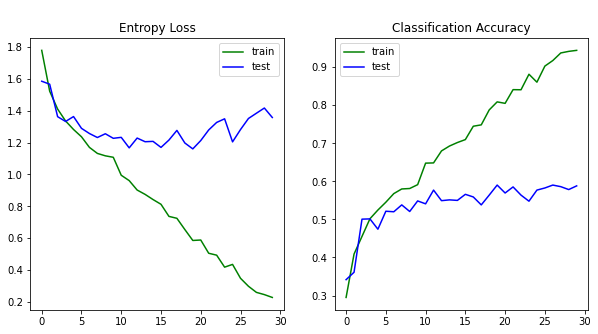

In [41]:
# Build graphs
summarize_diagnostics(history)

In [42]:
class_report(test_set, model)

Confusion Matrix
[[160   4  10  28  18  20]
 [ 12 127  37  13  13  38]
 [ 18  15 135  20   6  46]
 [ 17   8  12 160  23  20]
 [ 40   3  14  36 130  17]
 [ 15  10  34  26  20 135]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.61      0.67      0.64       240
       Monet       0.76      0.53      0.62       240
     Pissaro       0.56      0.56      0.56       240
      Renoir       0.57      0.67      0.61       240
     Sargent       0.62      0.54      0.58       240
     VanGogh       0.49      0.56      0.52       240

    accuracy                           0.59      1440
   macro avg       0.60      0.59      0.59      1440
weighted avg       0.60      0.59      0.59      1440



In [43]:
# Part 2 - Add Dropout Regularization and Data Augmentation
# to our Baseline model step by step and evaluate an efficiency  
# ___________________________________________________________


# 1 step - Add Dropout

<h3>Model with 3 VGG blocks with dropout</h3>

In [24]:
# Prepare the data. Instanciate ImageDataGenerator that scalse the pixel values to the range of 0-1
# We don't use data augmentation, dropout etc for the Baseline models to check a minimal model performance 
# Prepare the data. Instanciate ImageDataGenerator that scalse the pixel values to the range of 0-1
# We don't use data augmentation, dropout etc for the Baseline models to check a minimal model performance 
datagen = ImageDataGenerator(rescale=1. / 255)

training_set = datagen.flow_from_directory('train', 
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.


In [25]:
# Define CNN model with Dropout Regularization
def model_with_dropout():
    #reset_random_seeds()
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
   
   
    model.add(Conv2D(64, (3, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
   

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
# The model will be fit for 35 epochs - to check if the model can learn the problem.
# Define model
model_d = model_with_dropout()
# Fit model
history = model_d.fit_generator(training_set, steps_per_epoch=len(training_set),
                                validation_data=test_set,
                                validation_steps=len(test_set), 
                                epochs= epochs)

Epoch 1/35
53/53 [==============================] - 40s 754ms/step - loss: 1.9414 - accuracy: 0.1856 - val_loss: 1.7258 - val_accuracy: 0.2493
Epoch 2/35
53/53 [==============================] - 40s 751ms/step - loss: 1.7287 - accuracy: 0.2379 - val_loss: 1.6876 - val_accuracy: 0.2931
Epoch 3/35
53/53 [==============================] - 40s 751ms/step - loss: 1.7063 - accuracy: 0.2569 - val_loss: 1.6729 - val_accuracy: 0.2556
Epoch 4/35
53/53 [==============================] - 40s 755ms/step - loss: 1.6772 - accuracy: 0.2790 - val_loss: 1.6171 - val_accuracy: 0.3625
Epoch 5/35
53/53 [==============================] - 40s 748ms/step - loss: 1.6373 - accuracy: 0.3176 - val_loss: 1.5768 - val_accuracy: 0.4139
Epoch 6/35
53/53 [==============================] - 41s 774ms/step - loss: 1.6099 - accuracy: 0.3437 - val_loss: 1.5822 - val_accuracy: 0.4007
Epoch 7/35
53/53 [==============================] - 40s 750ms/step - loss: 1.6008 - accuracy: 0.3514 - val_loss: 1.5438 - val_accuracy: 0.4215

In [27]:
# Evaluate model
_, acc = model_d.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 61.2500


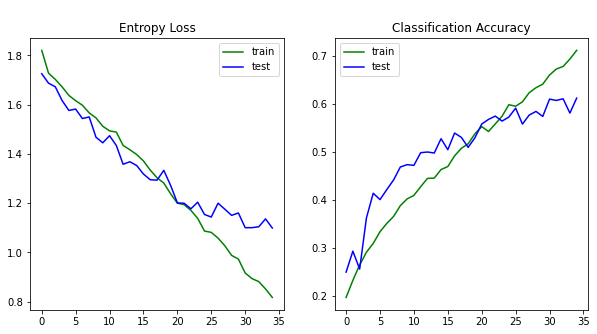

In [28]:
# Build graphs
summarize_diagnostics(history)

In [29]:
# As we see model overfitts less after usage of dropout

In [30]:
class_report(test_set, model_d)

Confusion Matrix
[[157  13   1  28  32   9]
 [ 16 147  33  10  15  19]
 [ 15  28 145  17  15  20]
 [ 15   8  14 165  26  12]
 [ 32   7  10  34 149   8]
 [ 18  24  28  24  27 119]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.62      0.65      0.64       240
       Monet       0.65      0.61      0.63       240
     Pissaro       0.63      0.60      0.62       240
      Renoir       0.59      0.69      0.64       240
     Sargent       0.56      0.62      0.59       240
     VanGogh       0.64      0.50      0.56       240

    accuracy                           0.61      1440
   macro avg       0.62      0.61      0.61      1440
weighted avg       0.62      0.61      0.61      1440



In [50]:
# 2 step - Add Data augmentation
# Use our model with dropout

<h3>Model with 3 VGG blocks with dropout and data augmentation</h3>


<h4>Trained for 35 epochs</h4>


In [51]:
# Create data generators 
# Train generator with data augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [52]:
# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.


In [53]:
# Define model
model1 = model_with_dropout()
# Fit model
history = model1.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= epochs)

Epoch 1/35
53/53 [==============================] - 43s 795ms/step - loss: 1.8587 - accuracy: 0.1924 - val_loss: 1.6800 - val_accuracy: 0.3167
Epoch 2/35
53/53 [==============================] - 41s 763ms/step - loss: 1.6954 - accuracy: 0.2624 - val_loss: 1.5971 - val_accuracy: 0.3986
Epoch 3/35
53/53 [==============================] - 40s 752ms/step - loss: 1.6354 - accuracy: 0.3268 - val_loss: 1.5288 - val_accuracy: 0.4424
Epoch 4/35
53/53 [==============================] - 41s 765ms/step - loss: 1.6327 - accuracy: 0.3401 - val_loss: 1.5021 - val_accuracy: 0.4396
Epoch 5/35
53/53 [==============================] - 41s 779ms/step - loss: 1.5733 - accuracy: 0.3511 - val_loss: 1.4806 - val_accuracy: 0.4437
Epoch 6/35
53/53 [==============================] - 49s 923ms/step - loss: 1.5594 - accuracy: 0.3820 - val_loss: 1.4980 - val_accuracy: 0.4521
Epoch 7/35
53/53 [==============================] - 48s 904ms/step - loss: 1.5288 - accuracy: 0.3919 - val_loss: 1.4346 - val_accuracy: 0.4764

In [54]:
# Evaluate model
_, acc = model1.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 54.7917


In [56]:
class_report(test_set, model1)

Confusion Matrix
[[164   5   9   1  16  45]
 [  4  94  50   0  14  78]
 [  9   9 143   1   5  73]
 [ 22   2  34  69  43  70]
 [ 50   5  10   4 128  43]
 [ 13   4  22   0  10 191]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.63      0.68      0.65       240
       Monet       0.79      0.39      0.52       240
     Pissaro       0.53      0.60      0.56       240
      Renoir       0.92      0.29      0.44       240
     Sargent       0.59      0.53      0.56       240
     VanGogh       0.38      0.80      0.52       240

    accuracy                           0.55      1440
   macro avg       0.64      0.55      0.54      1440
weighted avg       0.64      0.55      0.54      1440



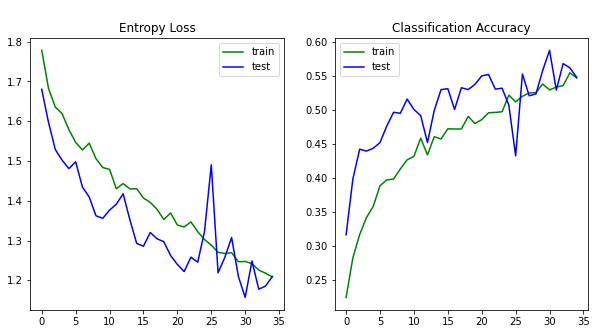

In [55]:
# Build graphs
summarize_diagnostics(history)

In [ ]:
# As we see from out graphs number of epochs could be increased to higher than 35 epochs

<h4>Trained for 50 epochs</h4>


In [ ]:
# Let's check how modek learns after 50 epochs

In [57]:
# Create data generators 
# Train generator with data augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1. / 255)

# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')
# Define model
model50 = model_with_dropout()
# Fit model
history = model50.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 50)

Epoch 1/50
53/53 [==============================] - 48s 889ms/step - loss: 1.8340 - accuracy: 0.2161 - val_loss: 1.6630 - val_accuracy: 0.3688
Epoch 2/50
53/53 [==============================] - 41s 763ms/step - loss: 1.6916 - accuracy: 0.2810 - val_loss: 1.6091 - val_accuracy: 0.3986
Epoch 3/50
53/53 [==============================] - 42s 785ms/step - loss: 1.6664 - accuracy: 0.3160 - val_loss: 1.5569 - val_accuracy: 0.4139
Epoch 4/50
53/53 [==============================] - 42s 796ms/step - loss: 1.6505 - accuracy: 0.3353 - val_loss: 1.5367 - val_accuracy: 0.4257
Epoch 5/50
53/53 [==============================] - 42s 795ms/step - loss: 1.6290 - accuracy: 0.3298 - val_loss: 1.5351 - val_accuracy: 0.4250
Epoch 6/50
53/53 [==============================] - 41s 770ms/step - loss: 1.5817 - accuracy: 0.3610 - val_loss: 1.5082 - val_accuracy: 0.4521
Epoch 7/50
53/53 [==============================] - 41s 774ms/step - loss: 1.5935 - accuracy: 0.3641 - val_loss: 1.4731 - val_accuracy: 0.4549

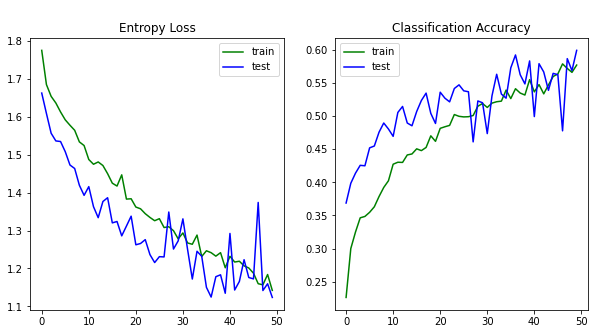

In [58]:
# Build graphs
summarize_diagnostics(history)

In [60]:
# Evaluate model
_, acc = model50.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 59.9306


In [75]:
# As sometimes data augmentation even decreases accuracy -
# https://towardsdatascience.com/balancing-the-regularization-effect-of-data-augmentation-eb551be48374
# we changed out approach of data augmentation to more simple one

<h4>Trained for max 85 epochs with different data augmentation (with Early Stopping)</h4>


In [43]:
# Implementing Early stoping and checkpoint to save the model with the highest accuracy
ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
MC = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, 
                     save_weights_only=False, mode='auto')

In [44]:
# Version with different data augmentation to check accuracy

# Create data generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

# Define model
model50 = model_with_dropout()
# Fit model
history = model50.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 85, callbacks=[ES, MC])

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.
Epoch 1/85
53/53 [==============================] - 44s 807ms/step - loss: 1.9243 - accuracy: 0.1870 - val_loss: 1.7485 - val_accuracy: 0.2764

Epoch 00001: val_accuracy improved from -inf to 0.27639, saving model to best_model.h5
Epoch 2/85
53/53 [==============================] - 43s 807ms/step - loss: 1.7444 - accuracy: 0.2401 - val_loss: 1.6744 - val_accuracy: 0.3063

Epoch 00002: val_accuracy improved from 0.27639 to 0.30625, saving model to best_model.h5
Epoch 3/85
53/53 [==============================] - 42s 792ms/step - loss: 1.7069 - accuracy: 0.2466 - val_loss: 1.6744 - val_accuracy: 0.3167

Epoch 00003: val_accuracy improved from 0.30625 to 0.31667, saving model to best_model.h5
Epoch 4/85
53/53 [==============================] - 46s 859ms/step - loss: 1.6744 - accuracy: 0.3005 - val_loss: 1.6115 - val_accuracy: 0.3799

Epoch 00004: val_accuracy improved from 0.31667 to 0.37986, saving model 

53/53 [==============================] - 42s 790ms/step - loss: 1.3057 - accuracy: 0.5095 - val_loss: 1.2508 - val_accuracy: 0.5236

Epoch 00039: val_accuracy did not improve from 0.54375
Epoch 40/85
53/53 [==============================] - 42s 791ms/step - loss: 1.2778 - accuracy: 0.5100 - val_loss: 1.1658 - val_accuracy: 0.5701

Epoch 00040: val_accuracy improved from 0.54375 to 0.57014, saving model to best_model.h5
Epoch 41/85
53/53 [==============================] - 43s 799ms/step - loss: 1.2343 - accuracy: 0.5205 - val_loss: 1.1645 - val_accuracy: 0.5604

Epoch 00041: val_accuracy did not improve from 0.57014
Epoch 42/85
53/53 [==============================] - 43s 805ms/step - loss: 1.2396 - accuracy: 0.5306 - val_loss: 1.3044 - val_accuracy: 0.5063

Epoch 00042: val_accuracy did not improve from 0.57014
Epoch 43/85
53/53 [==============================] - 42s 796ms/step - loss: 1.2286 - accuracy: 0.5333 - val_loss: 1.1498 - val_accuracy: 0.5896

Epoch 00043: val_accuracy improv


Epoch 00078: val_accuracy did not improve from 0.61944
Epoch 79/85
53/53 [==============================] - 41s 776ms/step - loss: 0.9499 - accuracy: 0.6489 - val_loss: 1.1928 - val_accuracy: 0.5889

Epoch 00079: val_accuracy did not improve from 0.61944
Epoch 80/85
53/53 [==============================] - 41s 772ms/step - loss: 0.9296 - accuracy: 0.6614 - val_loss: 1.1745 - val_accuracy: 0.5660

Epoch 00080: val_accuracy did not improve from 0.61944
Epoch 81/85
53/53 [==============================] - 44s 819ms/step - loss: 0.9472 - accuracy: 0.6531 - val_loss: 1.0670 - val_accuracy: 0.6146

Epoch 00081: val_accuracy did not improve from 0.61944
Epoch 82/85
53/53 [==============================] - 43s 801ms/step - loss: 0.9125 - accuracy: 0.6575 - val_loss: 1.0579 - val_accuracy: 0.6167

Epoch 00082: val_accuracy did not improve from 0.61944
Epoch 83/85
53/53 [==============================] - 41s 778ms/step - loss: 0.9163 - accuracy: 0.6688 - val_loss: 1.0235 - val_accuracy: 0.6326


In [78]:
# Create a new model instance to upload the best saved model there
# because our trained model finished training with the final accuracy not the best possible
model = model_with_dropout()

# Load the previously saved weights
model.load_weights('best_model.h5')
# Evaluate model

_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 63.2639


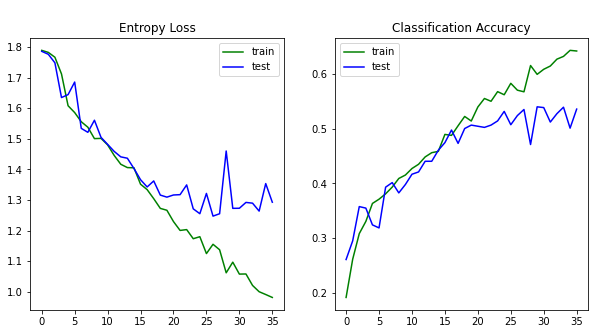

In [79]:
# Build graphs 
summarize_diagnostics(history)

<h4>Trained for 85 epochs and bigger size of pictures (224*224px) and Early Stopping</h4>

In [83]:
# Implementing Early stoping and checkpoint to save the model with the highest accuracy
ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
MC = ModelCheckpoint('best_model_224px.h5', monitor='val_accuracy', verbose=1, save_best_only=True, 
                     save_weights_only=False, mode='auto')

In [84]:
# Let's try to change pictures size from 128 to 224 and check accuracy
# Create data generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

img_rows = 224
img_cols = 224
# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

# Define model
model224 = model_with_dropout()
# Fit model
history = model224.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 85, callbacks=[ES, MC])

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.
Epoch 1/85
53/53 [==============================] - 124s 2s/step - loss: 2.0472 - accuracy: 0.1874 - val_loss: 1.7445 - val_accuracy: 0.2583

Epoch 00001: val_accuracy improved from -inf to 0.25833, saving model to best_model_224px.h5
Epoch 2/85
53/53 [==============================] - 123s 2s/step - loss: 1.7487 - accuracy: 0.2524 - val_loss: 1.6957 - val_accuracy: 0.3264

Epoch 00002: val_accuracy improved from 0.25833 to 0.32639, saving model to best_model_224px.h5
Epoch 3/85
53/53 [==============================] - 119s 2s/step - loss: 1.7046 - accuracy: 0.2620 - val_loss: 1.6335 - val_accuracy: 0.3472

Epoch 00003: val_accuracy improved from 0.32639 to 0.34722, saving model to best_model_224px.h5
Epoch 4/85
53/53 [==============================] - 119s 2s/step - loss: 1.6681 - accuracy: 0.2891 - val_loss: 1.6119 - val_accuracy: 0.4132

Epoch 00004: val_accuracy improved from 0.34722 to 0.41319, sav


Epoch 00038: val_accuracy did not improve from 0.60486
Epoch 39/85
53/53 [==============================] - 120s 2s/step - loss: 1.1724 - accuracy: 0.5586 - val_loss: 1.1726 - val_accuracy: 0.5556

Epoch 00039: val_accuracy did not improve from 0.60486
Epoch 40/85
53/53 [==============================] - 123s 2s/step - loss: 1.1371 - accuracy: 0.5720 - val_loss: 1.1442 - val_accuracy: 0.5722

Epoch 00040: val_accuracy did not improve from 0.60486
Epoch 41/85
53/53 [==============================] - 123s 2s/step - loss: 1.1601 - accuracy: 0.5682 - val_loss: 1.0721 - val_accuracy: 0.6167

Epoch 00041: val_accuracy improved from 0.60486 to 0.61667, saving model to best_model_224px.h5
Epoch 42/85
53/53 [==============================] - 126s 2s/step - loss: 1.1061 - accuracy: 0.5807 - val_loss: 1.0578 - val_accuracy: 0.6222

Epoch 00042: val_accuracy improved from 0.61667 to 0.62222, saving model to best_model_224px.h5
Epoch 43/85
53/53 [==============================] - 122s 2s/step - lo

In [85]:
# Create a new model instance to upload the best saved model there
# because our trained model finished training with the final accuracy not the best possible
model = model_with_dropout()

# Load the previously saved weights
model.load_weights('best_model_224px.h5')
# Evaluate model

_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 63.4722


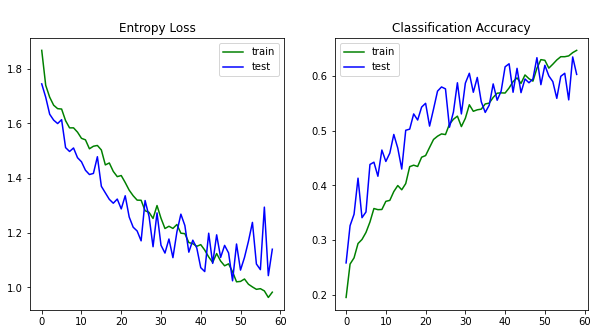

In [86]:
# Build graphs
summarize_diagnostics(history)

In [87]:
# As we see after 58 epochs our model didn't reached much higher level of accuracy 
# and because of the fact that calculations are computationally 
# expensive for bigger picture size we will continue with a model trained on small pictures of size 128*128
# as the difference in accuracy is almost neglectable:
# 0.63472 (for pictures with size 224px) against 0.63264 (for pictures with size 128px)

<h3>Model with a bit different architecture of VGG blocks, dropout, data augmentation</h3>
<h4>Trained for 70 max epochs and small size of pictures (128*128px)</h4>

In [69]:
# Implementing Early stoping
ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=9)
MC = ModelCheckpoint('best_model_blocks.h5', monitor='val_accuracy', 
                     verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

In [70]:
# Let's try out a bit different architecture with VGG blocks

In [71]:
# Define CNN model
img_rows = 128
img_cols = 128
def model_blocks():
    #reset_random_seeds()
    model = Sequential()
   
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
   
   
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    
    
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    
    
   
    model.add(Flatten())
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(6, activation='softmax', name='output'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [72]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

# Define model
model_blocks = model_blocks()
# Fit model
history = model_blocks.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 70, callbacks=[ES, MC])

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.
Epoch 1/70
53/53 [==============================] - 294s 6s/step - loss: 1.7907 - accuracy: 0.1923 - val_loss: 1.7863 - val_accuracy: 0.2611

Epoch 00001: val_accuracy improved from -inf to 0.26111, saving model to best_model_blocks.h5
Epoch 2/70
53/53 [==============================] - 279s 5s/step - loss: 1.7847 - accuracy: 0.2807 - val_loss: 1.7767 - val_accuracy: 0.2951

Epoch 00002: val_accuracy improved from 0.26111 to 0.29514, saving model to best_model_blocks.h5
Epoch 3/70
53/53 [==============================] - 279s 5s/step - loss: 1.7714 - accuracy: 0.2950 - val_loss: 1.7487 - val_accuracy: 0.3576

Epoch 00003: val_accuracy improved from 0.29514 to 0.35764, saving model to best_model_blocks.h5
Epoch 4/70
53/53 [==============================] - 276s 5s/step - loss: 1.7350 - accuracy: 0.3195 - val_loss: 1.6351 - val_accuracy: 0.3549

Epoch 00004: val_accuracy did not improve from 0.35764
Epoch

In [73]:
# Evaluate model
_, acc = model_blocks.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 53.5417


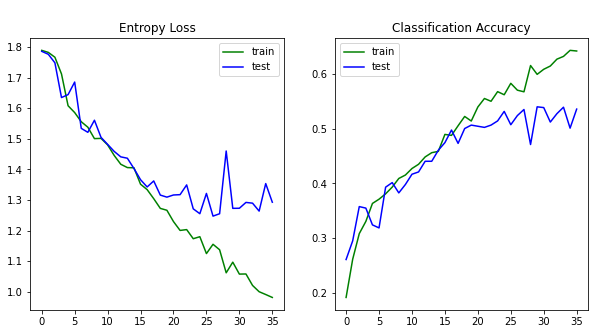

In [74]:
# Build graphs
summarize_diagnostics(history)

In [ ]:
# As we see our more complex model didn't have higher accuracy so we will continiue with 
# a model trained on small pictures of size 128*128 - best_model.h5

<h3>Model VGG16</h3>

In [88]:
# Implementing Early stoping
ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=9)
MC = ModelCheckpoint('best_model_vgg16.h5', monitor='val_accuracy', 
                     verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
img_rows = 128
img_cols = 128
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(img_rows,img_cols,3),filters=64, kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
   
    model.add(Flatten(name='flatten'))
    model.add(Dense(units=4096, activation="relu", name='fc1'))
    model.add(Dense(units=4096,activation="relu", name='fc2'))
    model.add(Dense(units=6, activation='softmax', name='output'))
    
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

# Define model
model_vgg = VGG16()
# Fit model
history = model_vgg.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 100, callbacks=[ES, MC])

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.
Epoch 1/100
53/53 [==============================] - 512s 10s/step - loss: 1.7917 - accuracy: 0.1719 - val_loss: 1.7914 - val_accuracy: 0.2313

Epoch 00001: val_accuracy improved from -inf to 0.23125, saving model to best_model_vgg16.h5
Epoch 2/100
53/53 [==============================] - 518s 10s/step - loss: 1.7914 - accuracy: 0.2089 - val_loss: 1.7910 - val_accuracy: 0.2896

Epoch 00002: val_accuracy improved from 0.23125 to 0.28958, saving model to best_model_vgg16.h5
Epoch 3/100
44/53 [=======================>......] - ETA: 1:24 - loss: 1.7910 - accuracy: 0.2378

In [68]:
# Evaluate model
_, acc = model_vgg.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 16.6667


In [ ]:
# Build graphs
summarize_diagnostics(history)